<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/ML_Linear_Regressionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Previsão de Preços de Imóveis com Regressão Linear

### Objetivo

Construir um modelo de **Regressão Linear** capaz de prever o preço médio de casas na Califórnia, utilizando variáveis como:

* área média,
* número de quartos,
* idade média das construções,
* proximidade de oceanos,
* entre outras disponíveis no dataset.


## Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Carregando o Dataset

In [3]:
# Carregando os dados
california = fetch_california_housing(as_frame=True)

# Transformando em DataFrame para facilitar a análise
df = california.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Principais variáveis:**

* `MedInc` – Renda média da região.
* `HouseAge` – Idade média das casas.
* `AveRooms` – Número médio de cômodos.
* `AveBedrms` – Número médio de quartos.
* `Population` – População da região.
* `AveOccup` – Ocupação média por casa.
* `Latitude`, `Longitude`.
* **Target (`MedHouseVal`)** – Valor médio da casa (em centenas de milhares de dólares).


## Análise Exploratória

Verificando a correlação entre variáveis:

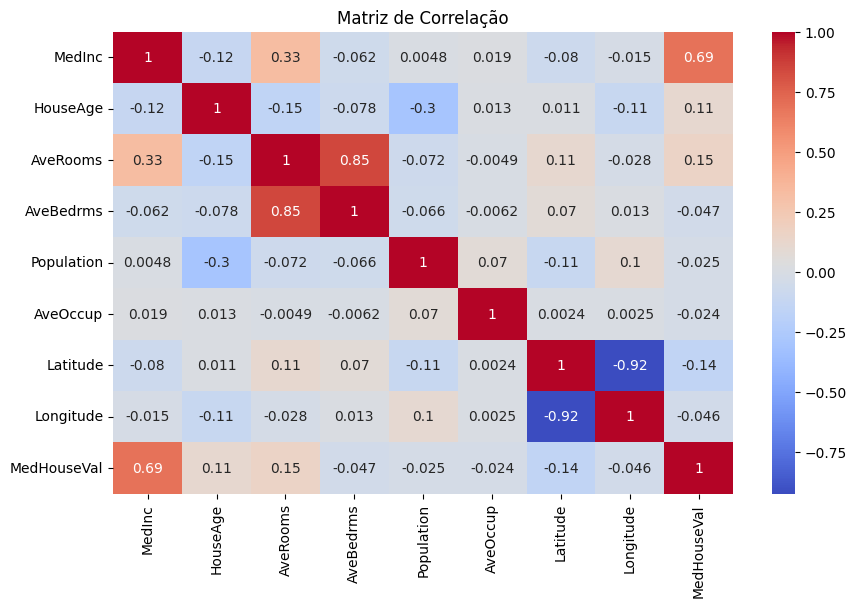

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## Separando Features e Target

Vamos definir as variáveis de entrada (X) e saída (y):

In [5]:
X = df.drop("MedHouseVal", axis=1)  # Features (características)
y = df["MedHouseVal"]              # Target (preço)

## Dividingo Treino e Teste

Divisão clássica em **80% treino / 20% teste**:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Criando e Treinando o Modelo

Usamos o modelo de regressão linear do `scikit-learn`:

In [7]:
# Instanciando o modelo
model = LinearRegression()

# Treinando
model.fit(X_train, y_train)

LinearRegression()

## Avaliando o Modelo

Vamos verificar **R² (coeficiente de determinação)** e **RMSE (Root Mean Squared Error)**:

In [8]:
# Predições no conjunto de teste
y_pred = model.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.5757877060324508
RMSE: 0.7455813830127764



**Interpretação:**

* **R²** indica o quanto do preço é explicado pelas variáveis (quanto mais próximo de 1, melhor).
* **RMSE** mostra o erro médio em milhares de dólares.

## Visualizando Resultado

Comparando valores reais vs previsão:

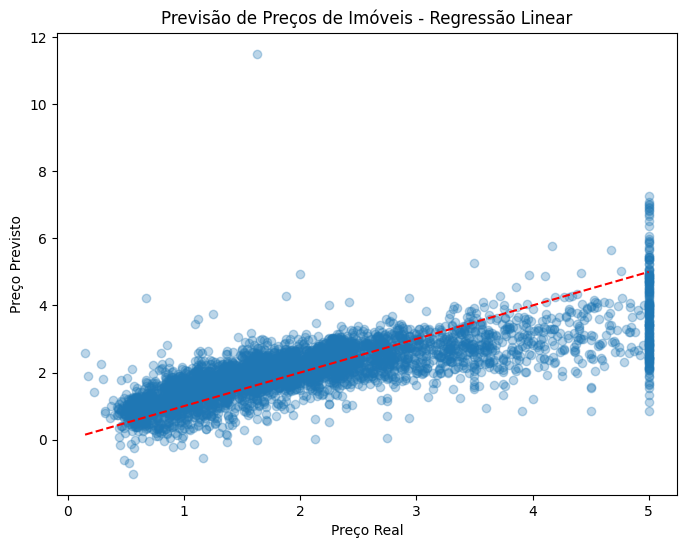

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Previsão de Preços de Imóveis - Regressão Linear")
plt.show()

Se os pontos estiverem próximos da linha vermelha, o modelo está funcionando bem.

## Interpretando os coeficientes

Os coeficientes mostram o peso de cada variável no preço:

In [10]:
coef_df = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)

print(coef_df)

     Variável  Coeficiente
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708


Exemplo de interpretação:

* Um aumento de 1 unidade em **MedInc (renda média)** aumenta fortemente o valor previsto da casa.
* Já variáveis como **Latitude/Longitude** também têm impacto, mostrando a influência da localização.

## Função de Regressão

mostrar a **função de regressão linear** a partir dos coeficientes ajuda bastante na interpretação do modelo.

No caso da regressão linear multivariada (com várias variáveis independentes), a função tem a forma:

$$
\hat{y} = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \dots + \beta_n \cdot x_n
$$

onde:

* $\hat{y}$ = valor previsto (preço da casa no nosso caso)
* $\beta_0$ = intercepto
* $\beta_i$ = coeficientes aprendidos pelo modelo
* $x_i$ = variáveis (features)

In [11]:
# Intercepto
intercepto = model.intercept_

# Coeficientes
coeficientes = model.coef_
variaveis = X.columns

# Mostrar como equação
equacao = f"Preço = {intercepto:.4f} "
for var, coef in zip(variaveis, coeficientes):
    equacao += f"+ ({coef:.4f} * {var}) "

print(equacao)

Preço = -37.0233 + (0.4487 * MedInc) + (0.0097 * HouseAge) + (-0.1233 * AveRooms) + (0.7831 * AveBedrms) + (-0.0000 * Population) + (-0.0035 * AveOccup) + (-0.4198 * Latitude) + (-0.4337 * Longitude) 
